## Author: Стурейко Игорь
### Course: Geekbrains.Kaggle
### Project: Lesson_01
### Date: 2020-10-30

## <a class="anchor" id="init_data" href="https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing">Данные</a> 

### Библиотеки

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msno
import scipy.stats as st
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

## Задание 1:
Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

### Загрузка данных

In [2]:
train = pd.read_csv("data/assignment1_data/train.csv")
test = pd.read_csv("data/assignment1_data/test.csv")

print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


In [3]:
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [4]:
test.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

#### Посмотрим пропуски - сколько и насколько их много

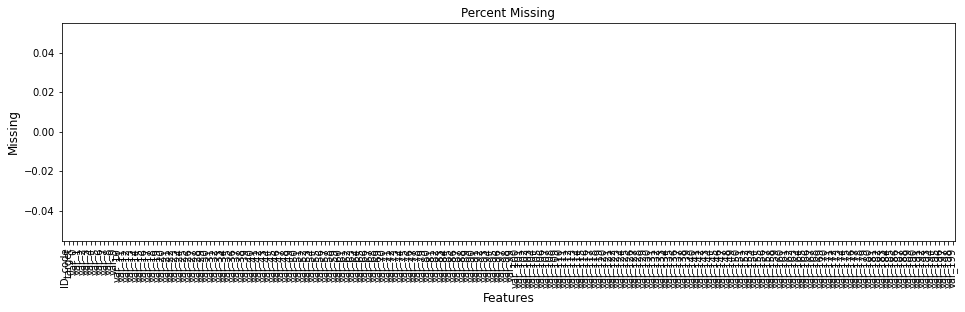

In [5]:
nan_df = (train.isna().sum() / train.shape[0]).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(16,4))
sns.barplot(nan_df['feature'], nan_df['nan_percent'])
plt.title('Percent Missing')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

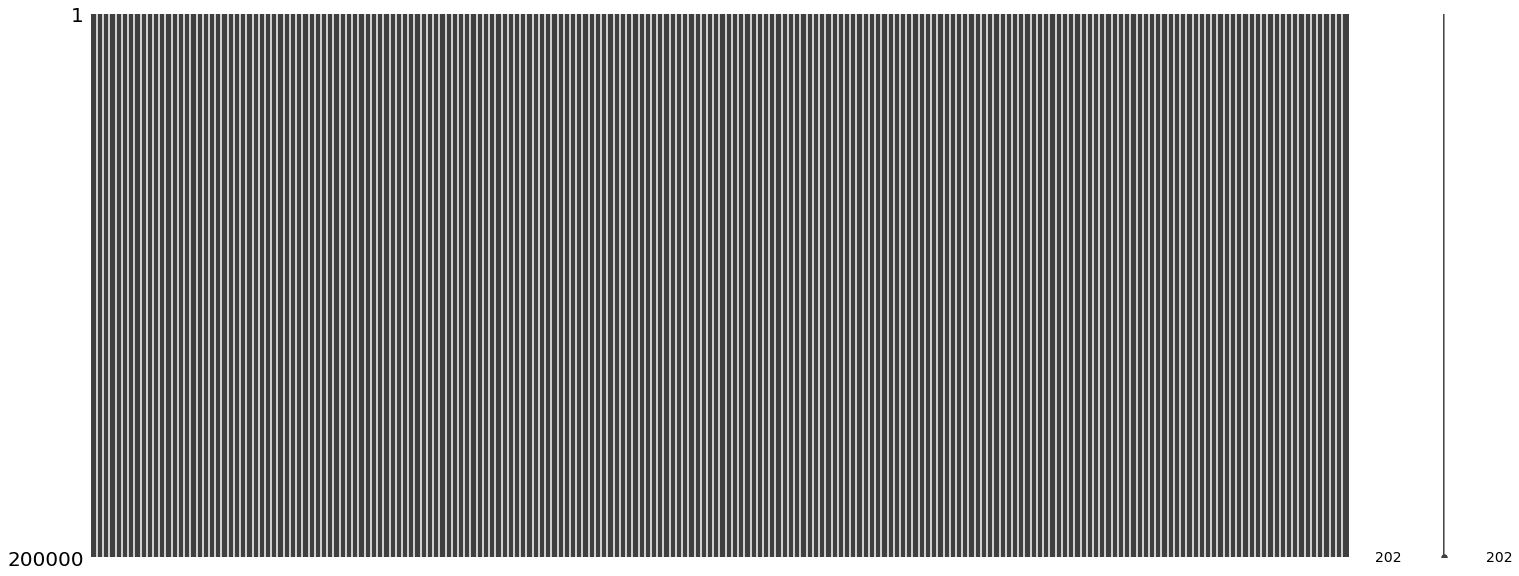

In [8]:
msno.matrix(train)
plt.show()

На графике нифига не видно - посмотрим списком

In [6]:
nan_df.loc[nan_df['nan_percent'] != 0].sort_values('nan_percent', ascending=False)

Empty DataFrame
Columns: [feature, nan_percent]
Index: []

__На трейне пропусков нет__

In [9]:
nan_df_test = (test.isna().sum() / test.shape[0]).reset_index()
nan_df_test.columns=['feature', 'nan_percent']
nan_df_test.loc[nan_df_test['nan_percent'] != 0].sort_values('nan_percent', ascending=False)

Empty DataFrame
Columns: [feature, nan_percent]
Index: []

__На тесте пропусков нет__

## Задание 2: 
Сделать базовый анализ целевой переменной, сделать выводы;

In [15]:
train["target"].unique()

array([0, 1])

In [16]:
train["target"].value_counts()

0    179902
1     20098
Name: target, dtype: int64

Целевая переменная бинарная - задача бинарного классификатора. 

Распределение целевой переменной несбалансировано - нужно будет обратить внимание на это при подборе модели

## Задание 3: 
Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

In [21]:
train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [18]:
numerical_features = train.select_dtypes(include=[np.number])
print(f"count of numeric_features: {numerical_features.shape[1]}")

numerical_features.columns

count of numeric_features: 201


Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [24]:
discrete_feature = [
    feature for feature in numerical_features
    if len(train[feature].unique())<25
]

print(f"Discrete Variables Count: {len(discrete_feature)}")

Discrete Variables Count: 1


In [25]:
continuous_feature = [
    feature for feature in numerical_features
    if feature not in discrete_feature + ["ID_code"]]

print(f"Continuous Feature Count {len(continuous_feature)}")

Continuous Feature Count 200


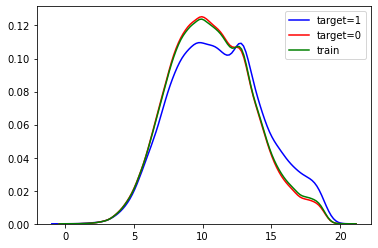

In [56]:
sns.kdeplot(train.loc[train['target']==1, 'var_0'], color="blue", label="target=1")
sns.kdeplot(train.loc[train['target']==0, 'var_0'], color="red", label="target=0")
sns.kdeplot(train['var_0'], color="green", label="train")
plt.show()

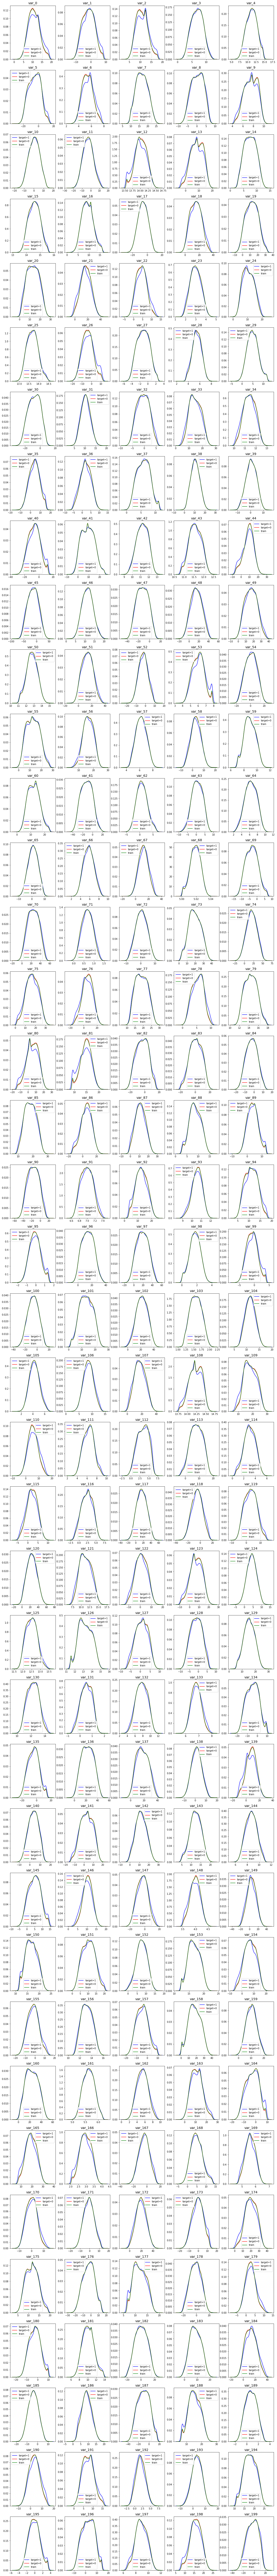

In [57]:
fig, axes = plt.subplots(40, 5, figsize=(20, 200))

for num, feature in enumerate(continuous_feature):
    sns.kdeplot(train.loc[train['target']==1, feature], ax=axes[num//5, num%5], color="blue", label="target=1")
    sns.kdeplot(train.loc[train['target']==0, feature], ax=axes[num//5, num%5], color="red", label="target=0")
    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="green", label="train")
    axes[num//5, num%5].set_title(feature, fontsize=14)
plt.show()

In [42]:
main_features = ['var_0', 'var_1', 'var_2', 'var_5', 'var_9', 'var_10',
                 'var_13', 'var_20', 'var_26', 'var_40', 'var_55', 'var_80',
                 'var_106', 'var_109', 'var_139', 'var_175', 'var_184', 'var_196']

In [43]:
len(main_features)

18

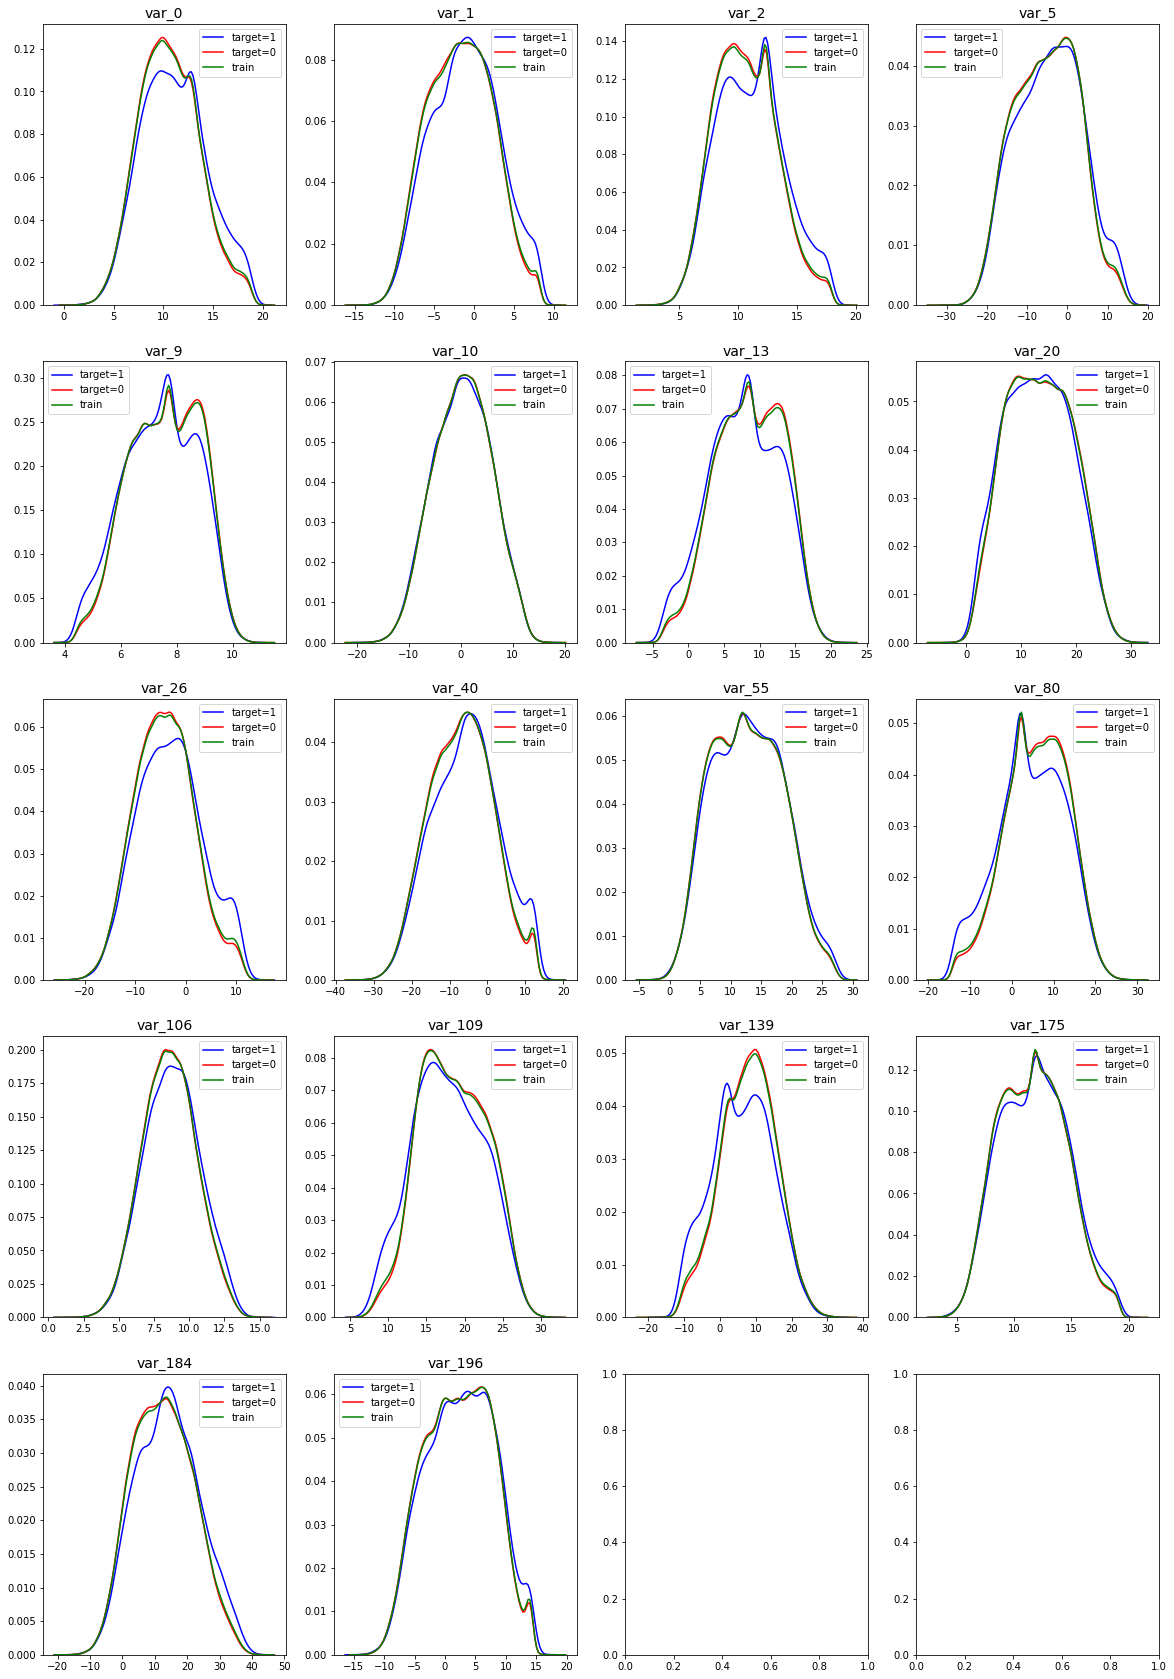

In [59]:
fig, axes = plt.subplots(5, 4, figsize=(20, 30))

for num, feature in enumerate(main_features):
    sns.kdeplot(train.loc[train['target']==1, feature], ax=axes[num//4, num%4], color="blue", label="target=1")
    sns.kdeplot(train.loc[train['target']==0, feature], ax=axes[num//4, num%4], color="red", label="target=0")
    sns.kdeplot(train[feature], ax=axes[num//4, num%4], color="green", label="train")
    axes[num//4, num%4].set_title(feature, fontsize=14)
plt.show()

Распределение признаков для target=0 в тесте и трейне совпадают, но идет различие в распределении при target=1

## Задание 4: 
Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

__Основные статистики в разрезе целевой переменной__

In [60]:
train.loc[train['target']==0, continuous_feature].describe()

var_0          var_1          var_2          var_3  \
count  179902.000000  179902.000000  179902.000000  179902.000000   
mean       10.626681      -1.695770      10.665876       6.788979   
std         3.008564       4.024813       2.612961       2.040082   
min         0.408400     -15.043400       2.117100      -0.040200   
25%         8.429500      -4.790775       8.698025       5.247625   
50%        10.478600      -1.682600      10.529000       6.817000   
75%        12.693075       1.287700      12.463900       8.317875   
max        20.315000      10.376800      19.353000      13.188300   

               var_4          var_5          var_6          var_7  \
count  179902.000000  179902.000000  179902.000000  179902.000000   
mean       11.072412      -5.146736       5.389620      16.549306   
std         1.620103       7.827522       0.857983       3.417700   
min         5.074800     -32.562600       2.347300       5.349700   
25%         9.880600     -11.260950       4.756425      13.950125   
50%        11.104400      -4.917700       5.364400      16.460850   
75%        12.253100       0.844600       5.981300      19.108800   
max        16.671400      17.251600       8.447700      27.691800   

               var_8          var_9  ...        var_190        var_191  \
count  179902.000000  179902.000000  ...  179902.000000  179902.000000   
mean        0.262347       7.584907  ...       3.149130       7.390800   
std         3.331105       1.228839  ...       4.522568       2.997847   
min       -10.505500       3.970500  ...     -14.093300      -2.691700   
25%        -2.342575       6.637500  ...      -0.111850       5.130825   
50%         0.371400       7.645600  ...       3.117250       7.297000   
75%         2.919300       8.598075  ...       6.296375       9.461300   
max        10.151300      11.150600  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  179902.000000  179902.000000  179902.000000  179902.000000   
mean        1.949017       3.355403      18.017716      -0.155601   
std         1.476456       3.982819       3.127715       1.422275   
min        -3.814500     -10.845500       8.694400      -5.261000   
25%         0.915300       0.612400      15.656700      -1.178700   
50%         1.928950       3.417550      17.982400      -0.184200   
75%         2.969800       6.217075      20.417500       0.813000   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  179902.000000  179902.000000  179902.000000  179902.000000  
mean        2.260297       8.919032      15.924058      -3.415273  
std         5.441118       0.917467       2.978539      10.434525  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.987375       8.262100      13.896000     -11.312025  
50%         2.359700       8.897700      15.988500      -2.914000  
75%         6.513425       9.601500      18.095400       4.741400  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 200 columns]

In [61]:
train.loc[train['target']==1, continuous_feature].describe()

var_0         var_1         var_2         var_3         var_4  \
count  20098.000000  20098.000000  20098.000000  20098.000000  20098.000000   
mean      11.156418     -1.017613     11.156633      6.864113     11.131337   
std        3.270293      4.220638      2.841075      2.070898      1.649266   
min        0.452800    -14.037000      2.946200      0.374000      5.876200   
25%        8.695875     -4.203475      8.961125      5.314300      9.911250   
50%       11.001350     -0.992650     11.096700      6.900200     11.156300   
75%       13.343700      2.001375     13.047025      8.384725     12.328450   
max       19.458300      9.029800     18.294100     12.706900     15.692500   

              var_5         var_6         var_7         var_8         var_9  \
count  20098.000000  20098.000000  20098.000000  20098.000000  20098.000000   
mean      -4.336522      5.581966     16.514917      0.479432      7.409064   
std        8.140281      0.922442      3.421365      3.340028      1.278709   
min      -28.246100      2.496000      7.302400     -9.839100      4.186100   
25%      -10.615800      4.882250     13.880125     -2.107425      6.451575   
50%       -4.101950      5.601800     16.412700      0.579600      7.484950   
75%        1.619950      6.218550     19.044250      3.127825      8.437200   
max       16.423600      8.285200     27.039800      9.033000     10.588100   

       ...       var_190       var_191       var_192       var_193  \
count  ...  20098.000000  20098.000000  20098.000000  20098.000000   
mean   ...      3.998064      7.864560      1.738266      3.120260   
std    ...      4.814830      3.210779      1.482537      4.067550   
min    ...    -11.906900     -2.343000     -3.317700    -11.783400   
25%    ...      0.466025      5.418550      0.669775      0.343000   
50%    ...      4.017500      7.846550      1.667500      3.176700   
75%    ...      7.407925     10.018400      2.749050      6.063825   
max    ...     16.746100     16.520500      7.647600     17.150400   

            var_194       var_195       var_196       var_197       var_198  \
count  20098.000000  20098.000000  20098.000000  20098.000000  20098.000000   
mean      17.779568     -0.021130      2.688583      8.810815     15.393283   
std        3.193153      1.485975      5.556892      0.952554      3.248123   
min       10.120700     -5.018500    -14.020400      6.119000      6.558700   
25%       15.420025     -1.103950     -1.572225      8.155250     13.232500   
50%       17.730500     -0.057350      2.831050      8.795400     15.427950   
75%       20.201800      0.986450      6.956250      9.517000     17.776425   
max       27.295300      4.088100     17.161400     11.706900     25.857100   

            var_199  
count  20098.000000  
mean      -2.532243  
std       10.435910  
min      -38.852800  
25%      -10.285050  
50%       -1.971850  
75%        5.701475  
max       24.564600  

[8 rows x 200 columns]

__Стандартное отклонение - среднее__

In [75]:
train.loc[train['target']==0, continuous_feature].describe().iloc[1:3]

var_0     var_1      var_2     var_3      var_4     var_5     var_6  \
mean  10.626681 -1.695770  10.665876  6.788979  11.072412 -5.146736  5.389620   
std    3.008564  4.024813   2.612961  2.040082   1.620103  7.827522  0.857983   

          var_7     var_8     var_9  ...   var_190   var_191   var_192  \
mean  16.549306  0.262347  7.584907  ...  3.149130  7.390800  1.949017   
std    3.417700  3.331105  1.228839  ...  4.522568  2.997847  1.476456   

       var_193    var_194   var_195   var_196   var_197    var_198    var_199  
mean  3.355403  18.017716 -0.155601  2.260297  8.919032  15.924058  -3.415273  
std   3.982819   3.127715  1.422275  5.441118  0.917467   2.978539  10.434525  

[2 rows x 200 columns]

In [76]:
train.loc[train['target']==1, continuous_feature].describe().iloc[1:3]

var_0     var_1      var_2     var_3      var_4     var_5     var_6  \
mean  11.156418 -1.017613  11.156633  6.864113  11.131337 -4.336522  5.581966   
std    3.270293  4.220638   2.841075  2.070898   1.649266  8.140281  0.922442   

          var_7     var_8     var_9  ...   var_190   var_191   var_192  \
mean  16.514917  0.479432  7.409064  ...  3.998064  7.864560  1.738266   
std    3.421365  3.340028  1.278709  ...  4.814830  3.210779  1.482537   

      var_193    var_194   var_195   var_196   var_197    var_198    var_199  
mean  3.12026  17.779568 -0.021130  2.688583  8.810815  15.393283  -2.532243  
std   4.06755   3.193153  1.485975  5.556892  0.952554   3.248123  10.435910  

[2 rows x 200 columns]

___Не совсем понял что тут нужно было сделать___

## Задание 5: 
Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

In [78]:
correlation = numerical_features.corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
             ...   
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, Length: 201, dtype: float64

Text(0, 0.5, 'Density')

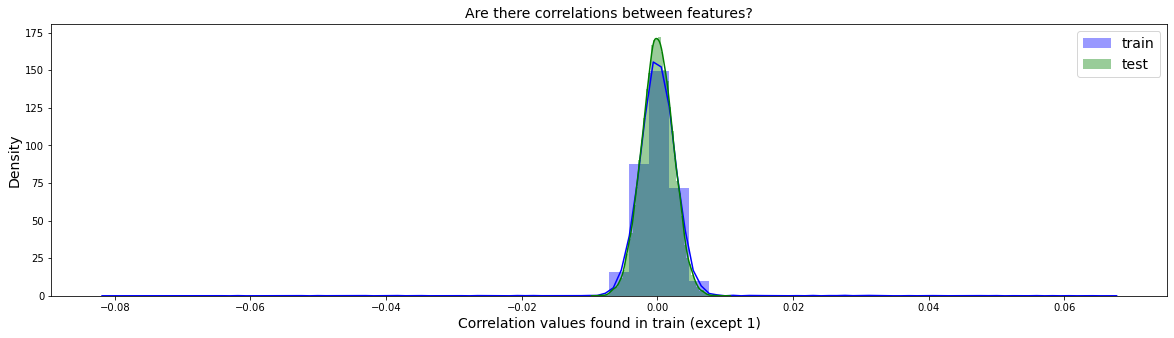

In [79]:
train_correlations = numerical_features.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = numerical_features.columns.tolist()
columns.remove("target")

test_correlations = test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

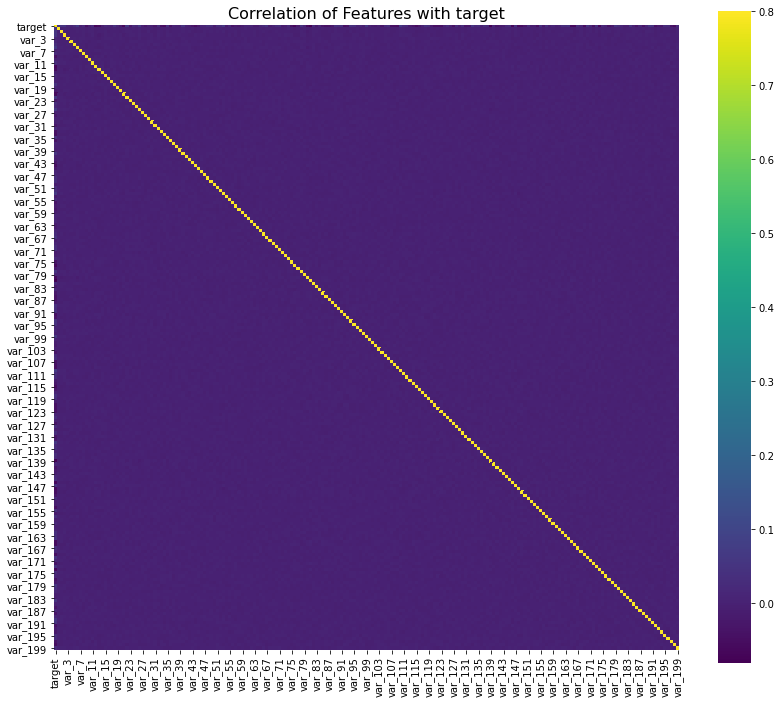

In [80]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Features with target", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

__Кореляций между признаками нет__

## Задание 6: 
Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

In [82]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestClassifier(**parameters)
forest.fit(numerical_features.fillna(-9999).drop("target", axis=1), train["target"])

CPU times: user 1min 7s, sys: 1.83 s, total: 1min 9s
Wall time: 43.7 s


RandomForestClassifier(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

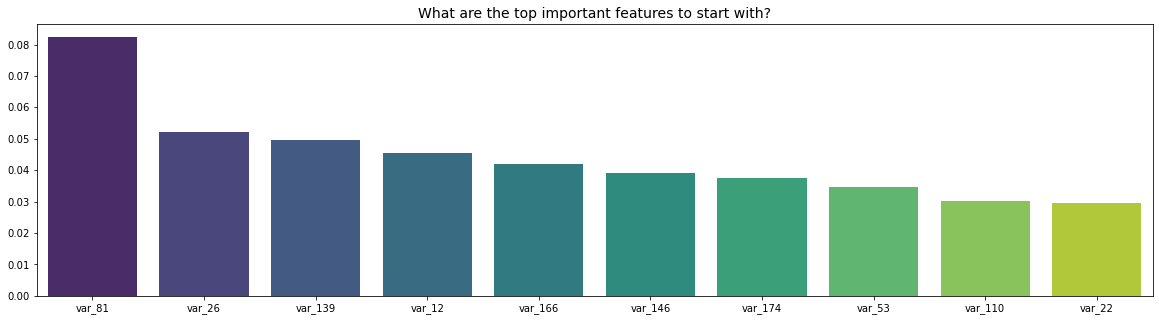

In [83]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.drop("target", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

In [88]:
feature_names[idx]

Index(['var_81', 'var_26', 'var_139', 'var_12', 'var_166', 'var_146',
       'var_174', 'var_53', 'var_110', 'var_22'],
      dtype='object')

/Users/igor/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


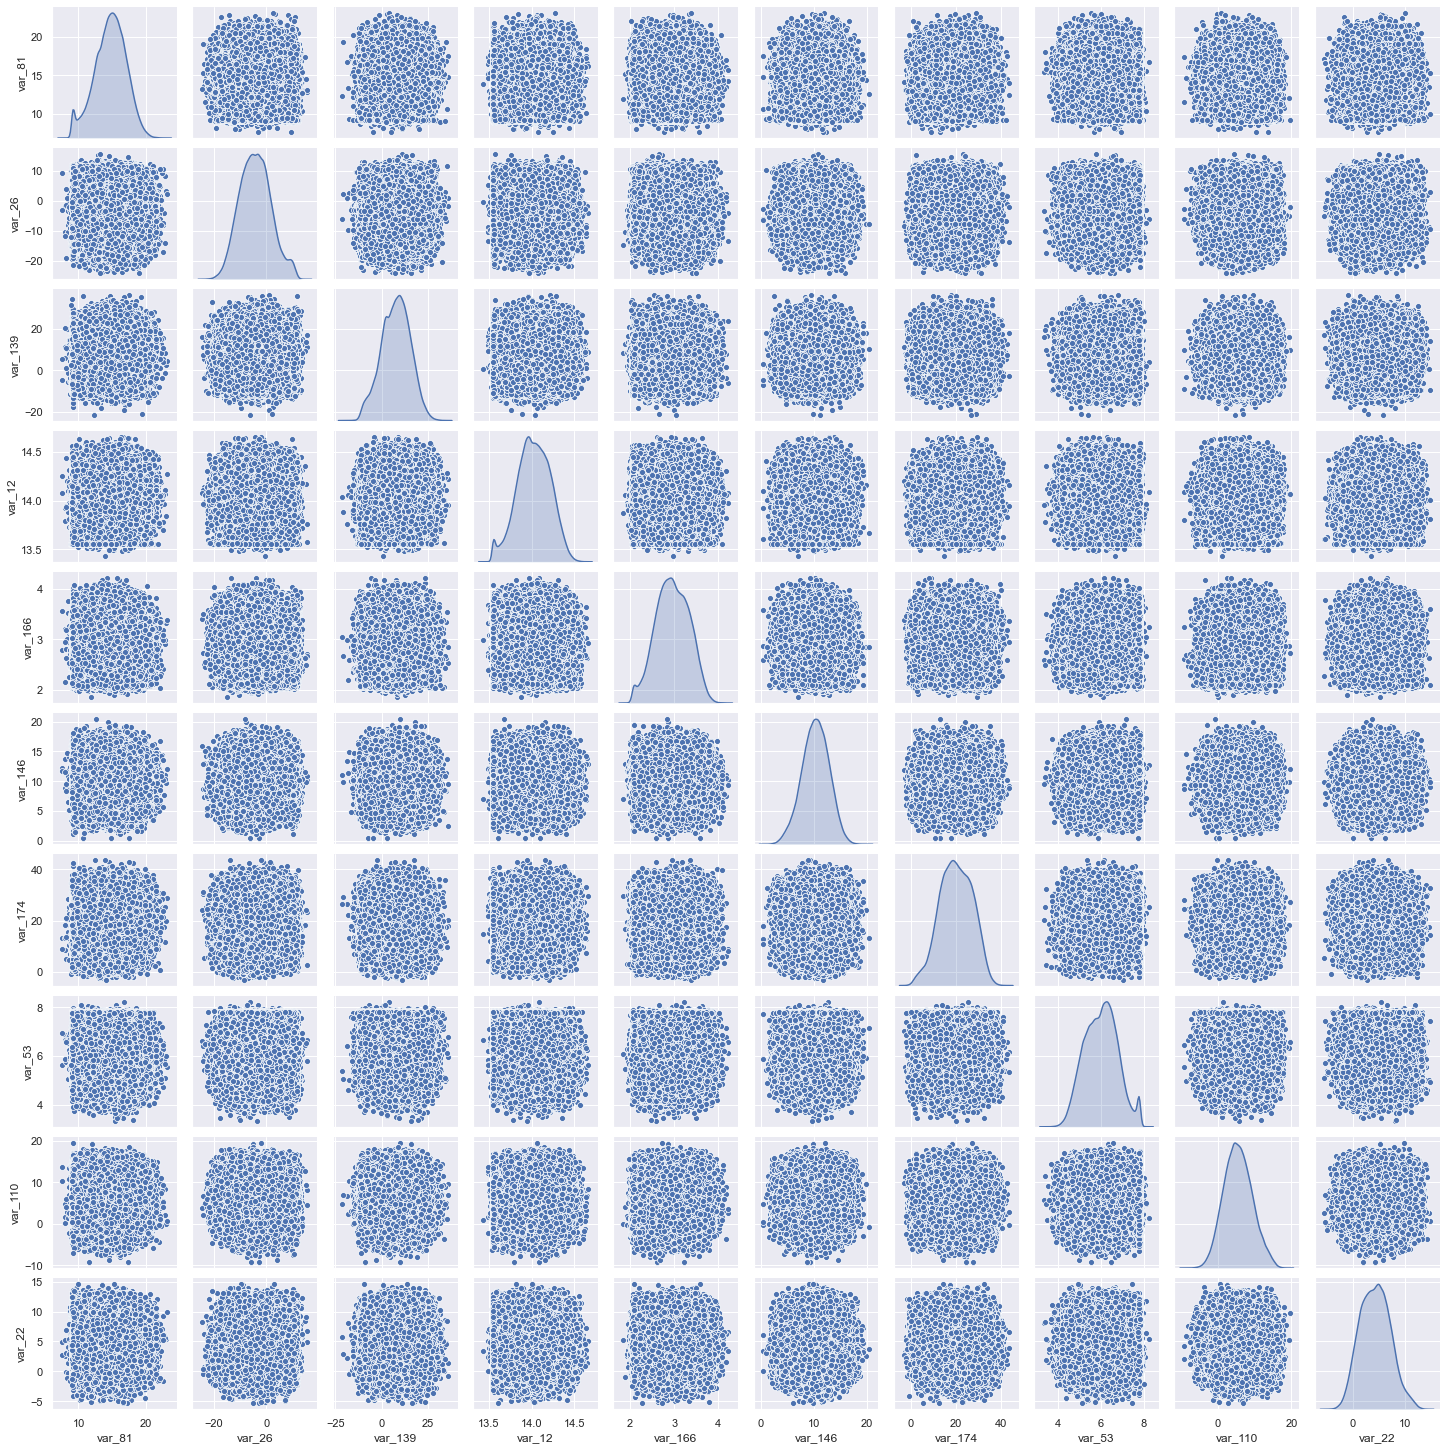

In [86]:
sns.set()
columns = feature_names[idx]

sns.pairplot(train[columns], size=2, kind="scatter", diag_kind="kde")
plt.show()

## Задание 7: 
Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

см. задание 3 - Распределение признаков для target=0 в тесте и трейне совпадают, но идет различие в распределении при target=1